In [336]:
import pandas as pd
import numpy as np
from random import sample
from pandas import *
import matplotlib.pyplot as plt

%matplotlib inline

print 'Pandas version: ' + pd.__version__

Pandas version: 0.14.0


In [337]:
# This section reads a csv file and tests to make sure the header is correct

df = pd.read_csv(r"C:\Users\dustin\Dropbox\AKWarm Documentation\02. Work\01. Task 2 - AKWarm library update\Climate Library\NOAA 1981 - 2010 Alaska Hourly Wind Speeds.csv", index_col=None, header=0)
df.head()

STATION             STATION_NAME  ELEVATION  LATITUDE  LONGITUDE  \
0  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
1  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
2  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
3  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
4  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   

             DATE  HLY-WIND-AVGSPD  HLY-WIND-VCTDIR  HLY-WIND-VCTSPD  \
0  20100101 00:00               51               13               43   
1  20100101 01:00               52               11               43   
2  20100101 02:00               52               10               43   
3  20100101 03:00               51               10               43   
4  20100101 04:00               54               14               45   

   HLY-WIND-PCTCLM  HLY-WIND-1STDIR  HLY-WIND-1STPCT  HLY-WIND-2NDDIR  \
0              242                1              401                2   
1              240                1              392                2   
2              261                1              360                2   
3              254                1              395                2   
4              232                1              373                2   

   HLY-WIND-2NDPCT  
0              225  
1              213  
2              199  
3              180  
4              253

In [338]:
# Converts to pandas datetime

df['DATE'] = to_datetime(df['DATE'])
df.head()

STATION             STATION_NAME  ELEVATION  LATITUDE  LONGITUDE  \
0  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
1  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
2  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
3  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
4  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   

                 DATE  HLY-WIND-AVGSPD  HLY-WIND-VCTDIR  HLY-WIND-VCTSPD  \
0 2010-01-01 00:00:00               51               13               43   
1 2010-01-01 01:00:00               52               11               43   
2 2010-01-01 02:00:00               52               10               43   
3 2010-01-01 03:00:00               51               10               43   
4 2010-01-01 04:00:00               54               14               45   

   HLY-WIND-PCTCLM  HLY-WIND-1STDIR  HLY-WIND-1STPCT  HLY-WIND-2NDDIR  \
0              242                1              401                2   
1              240                1              392                2   
2              261                1              360                2   
3              254                1              395                2   
4              232                1              373                2   

   HLY-WIND-2NDPCT  
0              225  
1              213  
2              199  
3              180  
4              253

In [339]:
noaa_index = list(df['STATION_NAME'].unique())
noaa_index


['TALKEETNA AIRPORT AK US',
 'HOMER AIRPORT AK US',
 'ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US',
 'ST PAUL ISLAND AIRPORT AK US',
 'MCGRATH AIRPORT AK US',
 'BARROW W POST W ROGERS AIRPORT AK US',
 'GULKANA AIRPORT AK US',
 'ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US',
 'BIG DELTA AIRPORT AK US',
 'COLD BAY AIRPORT AK US',
 'BETTLES AIRPORT AK US',
 'YAKUTAT AIRPORT AK US',
 'BETHEL AIRPORT AK US',
 'KOTZEBUE RALPH WEIN MEMORIAL AIRPORT AK ',
 'KODIAK AIRPORT AK US',
 'JUNEAU INTERNATIONAL AIRPORT AK US',
 'VALDEZ WEATHER SERVICE OFFICE AK US',
 'NOME MUNICIPAL AIRPORT AK US',
 'KING SALMON AIRPORT AK US',
 'FAIRBANKS INTERNATIONAL AIRPORT AK US']

In [340]:
df.dtypes

STATION                    object
STATION_NAME               object
ELEVATION                 float64
LATITUDE                  float64
LONGITUDE                 float64
DATE               datetime64[ns]
HLY-WIND-AVGSPD             int64
HLY-WIND-VCTDIR             int64
HLY-WIND-VCTSPD             int64
HLY-WIND-PCTCLM             int64
HLY-WIND-1STDIR             int64
HLY-WIND-1STPCT             int64
HLY-WIND-2NDDIR             int64
HLY-WIND-2NDPCT             int64
dtype: object

In [341]:
# Creates month column
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
# Hourly wind speeds are in tenths of MPH, converts to just MPH in a new column
df['WINDSPEED_MPH'] = df['HLY-WIND-AVGSPD'].map(lambda x: float(x) / 10)
df.head()

STATION             STATION_NAME  ELEVATION  LATITUDE  LONGITUDE  \
0  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
1  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
2  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
3  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   
4  GHCND:USW00026528  TALKEETNA AIRPORT AK US      106.7     62.32   -150.095   

                 DATE  HLY-WIND-AVGSPD  HLY-WIND-VCTDIR  HLY-WIND-VCTSPD  \
0 2010-01-01 00:00:00               51               13               43   
1 2010-01-01 01:00:00               52               11               43   
2 2010-01-01 02:00:00               52               10               43   
3 2010-01-01 03:00:00               51               10               43   
4 2010-01-01 04:00:00               54               14               45   

   HLY-WIND-PCTCLM  HLY-WIND-1STDIR  HLY-WIND-1STPCT  HLY-WIND-2NDDIR  \
0              242                1              401                2   
1              240                1              392                2   
2              261                1              360                2   
3              254                1              395                2   
4              232                1              373                2   

   HLY-WIND-2NDPCT  MONTH  WINDSPEED_MPH  
0              225      1            5.1  
1              213      1            5.2  
2              199      1            5.2  
3              180      1            5.1  
4              253      1            5.4

In [342]:
# Averages by month
monthly_wind = df.groupby(['STATION_NAME','MONTH']).mean()

# Show only monthly avg wind speed
monthly_wind = monthly_wind[['WINDSPEED_MPH']]
monthly_wind

WINDSPEED_MPH
STATION_NAME                                      MONTH               
ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US 1           6.667876
                                                  2           6.743601
                                                  3           7.318439
                                                  4           7.370972
                                                  5           8.369624
                                                  6           8.298333
                                                  7           7.433602
                                                  8           6.902419
                                                  9           7.049861
                                                  10          6.784543
                                                  11          6.671944
                                                  12          6.330108
ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US      1           9.518750
                                                  2           9.200893
                                                  3           9.432727
                                                  4           8.960417
                                                  5           8.109274
                                                  6           7.740625
                                                  7           7.068952
                                                  8           7.144960
                                                  9           7.536875
                                                  10          8.958468
                                                  11          9.486042
                                                  12          9.409677
BARROW W POST W ROGERS AIRPORT AK US              1          12.427688
                                                  2          12.615179
                                                  3          11.739704
                                                  4          11.905000
                                                  5          12.459005
                                                  6          12.049167
...                                                                ...
TALKEETNA AIRPORT AK US                           3           5.591215
                                                  4           4.828201
                                                  5           5.065230
                                                  6           5.129091
                                                  7           4.670088
                                                  8           3.795104
                                                  9           3.762158
                                                  10          4.051906
                                                  11          4.955887
                                                  12          5.162536
VALDEZ WEATHER SERVICE OFFICE AK US               1           7.520455
                                                  2           7.419126
                                                  3           7.000000
                                                  4           6.419192
                                                  5           7.882857
                                                  6           8.476301
                                                  7           7.905941
                                                  8           6.833333
YAKUTAT AIRPORT AK US                             1           6.046640
                                                  2           5.862054
                                                  3           6.302961
                                                  4           5.958056
                                                  5           6.019086
                                                  6           5.713889
          

In [343]:
#monthly_wind.to_excel('NOAA_Monthly_Wind_30_Year_Avg_Alaska.xlsx', sheet_name="First_Order_Sites")

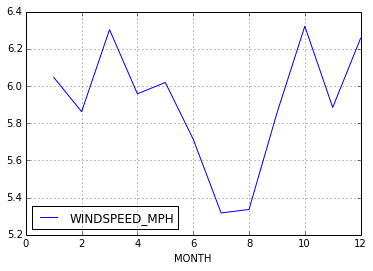

In [344]:
monthly_wind.loc['YAKUTAT AIRPORT AK US'].plot()

In [345]:
# List of just tmy sites with matching NOAA first order site
tmy_ids = [
    (702730, 'Anchorage Intl AP', 'II'),
    (703980, 'Annette Island AP', 'II'),
    (700260, 'Barrow W Post-W Rogers Arpt [NSA - ARM]', 'II'),
    (702190, 'Bethel Airport', 'II'),
    (701740, 'Bettles Field', 'II'),
    (702670, 'Big Delta Allen AAF', 'II'),
    (703160, 'Cold Bay Arpt', 'II'),
    (702610, 'Fairbanks Intl Arpt', 'II'),
    (702710, 'Gulkana Intermediate Field', 'II'),
    (703410, 'Homer Arpt', 'II'),
    (703810, 'Juneau Intl Arpt', 'II'),
    (703260, 'King Salmon Arpt', 'II'),
    (703500, 'Kodiak Airport', 'II'),
    (701330, 'Kotzebue Ralph Wein Memorial', 'II'),
    (702310, 'McGrath Arpt', 'II'),
    (702000, 'Nome Municipal Arpt', 'II'),
    (703080, 'St Paul Island Arpt', 'II'),
    (702510, 'Talkeetna State Arpt', 'II'),
    (702750, 'Valdez Wso', 'II'),
    (703610, 'Yakutat State Arpt', 'II')
]

In [346]:
noaa_index.sort()
noaa_index

['ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US',
 'ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US',
 'BARROW W POST W ROGERS AIRPORT AK US',
 'BETHEL AIRPORT AK US',
 'BETTLES AIRPORT AK US',
 'BIG DELTA AIRPORT AK US',
 'COLD BAY AIRPORT AK US',
 'FAIRBANKS INTERNATIONAL AIRPORT AK US',
 'GULKANA AIRPORT AK US',
 'HOMER AIRPORT AK US',
 'JUNEAU INTERNATIONAL AIRPORT AK US',
 'KING SALMON AIRPORT AK US',
 'KODIAK AIRPORT AK US',
 'KOTZEBUE RALPH WEIN MEMORIAL AIRPORT AK ',
 'MCGRATH AIRPORT AK US',
 'NOME MUNICIPAL AIRPORT AK US',
 'ST PAUL ISLAND AIRPORT AK US',
 'TALKEETNA AIRPORT AK US',
 'VALDEZ WEATHER SERVICE OFFICE AK US',
 'YAKUTAT AIRPORT AK US']

In [347]:
tmy_ids = DataFrame(tmy_ids, columns=['ids', 'tmy_station', 'tmy_class'])
tmy_ids['noaa_index'] = noaa_index
tmy_ids

ids                              tmy_station tmy_class  \
0   702730                        Anchorage Intl AP        II   
1   703980                        Annette Island AP        II   
2   700260  Barrow W Post-W Rogers Arpt [NSA - ARM]        II   
3   702190                           Bethel Airport        II   
4   701740                            Bettles Field        II   
5   702670                      Big Delta Allen AAF        II   
6   703160                            Cold Bay Arpt        II   
7   702610                      Fairbanks Intl Arpt        II   
8   702710               Gulkana Intermediate Field        II   
9   703410                               Homer Arpt        II   
10  703810                         Juneau Intl Arpt        II   
11  703260                         King Salmon Arpt        II   
12  703500                           Kodiak Airport        II   
13  701330             Kotzebue Ralph Wein Memorial        II   
14  702310                             McGrath Arpt        II   
15  702000                      Nome Municipal Arpt        II   
16  703080                      St Paul Island Arpt        II   
17  702510                     Talkeetna State Arpt        II   
18  702750                               Valdez Wso        II   
19  703610                       Yakutat State Arpt        II   

                                           noaa_index  
0   ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US  
1        ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US  
2                BARROW W POST W ROGERS AIRPORT AK US  
3                                BETHEL AIRPORT AK US  
4                               BETTLES AIRPORT AK US  
5                             BIG DELTA AIRPORT AK US  
6                              COLD BAY AIRPORT AK US  
7               FAIRBANKS INTERNATIONAL AIRPORT AK US  
8                               GULKANA AIRPORT AK US  
9                                 HOMER AIRPORT AK US  
10                 JUNEAU INTERNATIONAL AIRPORT AK US  
11                          KING SALMON AIRPORT AK US  
12                               KODIAK AIRPORT AK US  
13           KOTZEBUE RALPH WEIN MEMORIAL AIRPORT AK   
14                              MCGRATH AIRPORT AK US  
15                       NOME MUNICIPAL AIRPORT AK US  
16                       ST PAUL ISLAND AIRPORT AK US  
17                            TALKEETNA AIRPORT AK US  
18                VALDEZ WEATHER SERVICE OFFICE AK US  
19                              YAKUTAT AIRPORT AK US

In [348]:
subset = tmy_ids[['ids', 'noaa_index']]
tmy_tuple = [tuple(x) for x in subset.values]
tmy_tuple

[(702730L, 'ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US'),
 (703980L, 'ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US'),
 (700260L, 'BARROW W POST W ROGERS AIRPORT AK US'),
 (702190L, 'BETHEL AIRPORT AK US'),
 (701740L, 'BETTLES AIRPORT AK US'),
 (702670L, 'BIG DELTA AIRPORT AK US'),
 (703160L, 'COLD BAY AIRPORT AK US'),
 (702610L, 'FAIRBANKS INTERNATIONAL AIRPORT AK US'),
 (702710L, 'GULKANA AIRPORT AK US'),
 (703410L, 'HOMER AIRPORT AK US'),
 (703810L, 'JUNEAU INTERNATIONAL AIRPORT AK US'),
 (703260L, 'KING SALMON AIRPORT AK US'),
 (703500L, 'KODIAK AIRPORT AK US'),
 (701330L, 'KOTZEBUE RALPH WEIN MEMORIAL AIRPORT AK '),
 (702310L, 'MCGRATH AIRPORT AK US'),
 (702000L, 'NOME MUNICIPAL AIRPORT AK US'),
 (703080L, 'ST PAUL ISLAND AIRPORT AK US'),
 (702510L, 'TALKEETNA AIRPORT AK US'),
 (702750L, 'VALDEZ WEATHER SERVICE OFFICE AK US'),
 (703610L, 'YAKUTAT AIRPORT AK US')]

In [349]:
# tmy_ids = pd.DataFrame(tmy_ids, columns=['id','station_name','tmy_class'])

tmy_first_order = pd.DataFrame()

for ids, noaa_index, in tmy_tuple:
 
    # Read the TMY3 file into a Pandas DataFrame direct from the NREL site
    tmy = pd.read_csv('http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2005/data/tmy3/%sTYA.CSV' % ids, skiprows=1)
    # Create column with noaa station index
    tmy['STATION_NAME'] = noaa_index
    tmy_first_order = tmy_first_order.append(tmy)

tmy_first_order.head()

Date (MM/DD/YYYY) Time (HH:MM)  ETR (W/m^2)  ETRN (W/m^2)  GHI (W/m^2)  \
0        01/01/1976        01:00            0             0            0   
1        01/01/1976        02:00            0             0            0   
2        01/01/1976        03:00            0             0            0   
3        01/01/1976        04:00            0             0            0   
4        01/01/1976        05:00            0             0            0   

   GHI source  GHI uncert (%)  DNI (W/m^2)  DNI source  DNI uncert (%)  \
0           1               0            0           1               0   
1           1               0            0           1               0   
2           1               0            0           1               0   
3           1               0            0           1               0   
4           1               0            0           1               0   

        ...        Alb source  Alb uncert (code)  Lprecip depth (mm)  \
0       ...                 ?                  0                   0   
1       ...                 ?                  0                   0   
2       ...                 ?                  0                   0   
3       ...                 ?                  0                   0   
4       ...                 ?                  0                   0   

   Lprecip quantity (hr)  Lprecip source  Lprecip uncert (code)  \
0                      1               D                      9   
1                      1               D                      9   
2                      1               D                      9   
3                      1               D                      9   
4                      1               D                      9   

   PresWth (METAR code)  PresWth source  PresWth uncert (code)  \
0                    45               C                      8   
1                    45               C                      8   
2                    10               C                      8   
3                    45               C                      8   
4                    45               C                      8   

                                        STATION_NAME  
0  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US  
1  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US  
2  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US  
3  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US  
4  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US  

[5 rows x 72 columns]

In [350]:
tmy_first_order.dtypes

Date (MM/DD/YYYY)    object
Time (HH:MM)         object
ETR (W/m^2)           int64
ETRN (W/m^2)          int64
GHI (W/m^2)           int64
GHI source            int64
GHI uncert (%)        int64
DNI (W/m^2)           int64
DNI source            int64
DNI uncert (%)        int64
DHI (W/m^2)           int64
DHI source            int64
DHI uncert (%)        int64
GH illum (lx)         int64
GH illum source       int64
...
Pwat uncert (code)         int64
AOD (unitless)           float64
AOD source                object
AOD uncert (code)          int64
Alb (unitless)           float64
Alb source                object
Alb uncert (code)          int64
Lprecip depth (mm)         int64
Lprecip quantity (hr)      int64
Lprecip source            object
Lprecip uncert (code)      int64
PresWth (METAR code)       int64
PresWth source            object
PresWth uncert (code)      int64
STATION_NAME              object
Length: 72, dtype: object

In [351]:
# Changes date to pandas DateTime format
tmy_first_order['Date (MM/DD/YYYY)'] = to_datetime(tmy_first_order['Date (MM/DD/YYYY)'])
# Creates month column
tmy_first_order['MONTH'] = pd.DatetimeIndex(tmy_first_order['Date (MM/DD/YYYY)']).month
tmy_first_order.head()

Date (MM/DD/YYYY) Time (HH:MM)  ETR (W/m^2)  ETRN (W/m^2)  GHI (W/m^2)  \
0        1976-01-01        01:00            0             0            0   
1        1976-01-01        02:00            0             0            0   
2        1976-01-01        03:00            0             0            0   
3        1976-01-01        04:00            0             0            0   
4        1976-01-01        05:00            0             0            0   

   GHI source  GHI uncert (%)  DNI (W/m^2)  DNI source  DNI uncert (%)  \
0           1               0            0           1               0   
1           1               0            0           1               0   
2           1               0            0           1               0   
3           1               0            0           1               0   
4           1               0            0           1               0   

        ...        Alb uncert (code)  Lprecip depth (mm)  \
0       ...                        0                   0   
1       ...                        0                   0   
2       ...                        0                   0   
3       ...                        0                   0   
4       ...                        0                   0   

   Lprecip quantity (hr)  Lprecip source  Lprecip uncert (code)  \
0                      1               D                      9   
1                      1               D                      9   
2                      1               D                      9   
3                      1               D                      9   
4                      1               D                      9   

   PresWth (METAR code)  PresWth source  PresWth uncert (code)  \
0                    45               C                      8   
1                    45               C                      8   
2                    10               C                      8   
3                    45               C                      8   
4                    45               C                      8   

                                        STATION_NAME  MONTH  
0  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1  
1  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1  
2  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1  
3  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1  
4  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1  

[5 rows x 73 columns]

In [352]:
list(tmy_first_order.columns.values)

['Date (MM/DD/YYYY)',
 'Time (HH:MM)',
 'ETR (W/m^2)',
 'ETRN (W/m^2)',
 'GHI (W/m^2)',
 'GHI source',
 'GHI uncert (%)',
 'DNI (W/m^2)',
 'DNI source',
 'DNI uncert (%)',
 'DHI (W/m^2)',
 'DHI source',
 'DHI uncert (%)',
 'GH illum (lx)',
 'GH illum source',
 'Global illum uncert (%)',
 'DN illum (lx)',
 'DN illum source',
 'DN illum uncert (%)',
 'DH illum (lx)',
 'DH illum source',
 'DH illum uncert (%)',
 'Zenith lum (cd/m^2)',
 'Zenith lum source',
 'Zenith lum uncert (%)',
 'TotCld (tenths)',
 'TotCld source',
 'TotCld uncert (code)',
 'OpqCld (tenths)',
 'OpqCld source',
 'OpqCld uncert (code)',
 'Dry-bulb (C)',
 'Dry-bulb source',
 'Dry-bulb uncert (code)',
 'Dew-point (C)',
 'Dew-point source',
 'Dew-point uncert (code)',
 'RHum (%)',
 'RHum source',
 'RHum uncert (code)',
 'Pressure (mbar)',
 'Pressure source',
 'Pressure uncert (code)',
 'Wdir (degrees)',
 'Wdir source',
 'Wdir uncert (code)',
 'Wspd (m/s)',
 'Wspd source',
 'Wspd uncert (code)',
 'Hvis (m)',
 'Hvis source',

In [353]:
# Converts hourly wind speeds from meters per second to miles per hour in a new column
tmy_first_order['wind_speed_mph'] = tmy_first_order['Wspd (m/s)'].map(lambda x: float(x) * 60 * 60 / 1609.34)

In [365]:
# Calculate average wind speed by month for each station
tmy_monthly_wind = tmy_first_order.groupby(['STATION_NAME', 'MONTH']).mean()
tmy_monthly_wind = tmy_monthly_wind[['wind_speed_mph']]
tmy_monthly_wind

wind_speed_mph
STATION_NAME                                      MONTH                
ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US 1            5.435709
                                                  2            5.624311
                                                  3            7.603197
                                                  4            5.967664
                                                  5            8.464600
                                                  6            9.872370
                                                  7            8.435135
                                                  8            7.475114
                                                  9            7.513018
                                                  10           6.970299
                                                  11           6.268408
                                                  12           5.821461
ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US      1            9.531056
                                                  2           10.717348
                                                  3            9.519029
                                                  4            8.885941
                                                  5            9.223777
                                                  6            6.831683
                                                  7            6.853942
                                                  8            7.387621
                                                  9           10.111288
                                                  10           9.546691
                                                  11          10.043248
                                                  12          10.659148
BARROW W POST W ROGERS AIRPORT AK US              1           11.868420
                                                  2           11.345157
                                                  3           10.568348
                                                  4            9.497682
                                                  5           13.836868
                                                  6           11.582077
...                                                                 ...
TALKEETNA AIRPORT AK US                           7            5.905045
                                                  8            4.469975
                                                  9            3.375607
                                                  10           4.289577
                                                  11           6.063977
                                                  12           5.692776
VALDEZ WEATHER SERVICE OFFICE AK US               1            7.200908
                                                  2            6.521418
                                                  3            5.539137
                                                  4            4.353337
                                                  5            5.908353
                                                  6            6.069258
                                                  7            5.742987
                                                  8            4.412248
                                                  9            3.789442
                                                  10           5.548157
                                                  11          13.702201
                                                  12           5.343405
YAKUTAT AIRPORT AK US                             1            7.130853
                                                  2            6.761756
                                                  3            5.315142
                                                  4            5.222949
                                                  5            5.765838
                         

In [356]:
#df['DAY'] = pd.DatetimeIndex(df['DATE']).day
#df['YEAR'] = 2010
tmy_first_order['HOUR'] = tmy_first_order['Time (HH:MM)'].str[:2]
tmy_first_order['HOUR'] = tmy_first_order['HOUR'].convert_objects(convert_numeric=True)
tmy_first_order['DAY'] = pd.DatetimeIndex(tmy_first_order['Date (MM/DD/YYYY)']).day
tmy_first_order['YEAR'] = 2010
tmy_first_order.head()


Date (MM/DD/YYYY) Time (HH:MM)  ETR (W/m^2)  ETRN (W/m^2)  GHI (W/m^2)  \
0        1976-01-01        01:00            0             0            0   
1        1976-01-01        02:00            0             0            0   
2        1976-01-01        03:00            0             0            0   
3        1976-01-01        04:00            0             0            0   
4        1976-01-01        05:00            0             0            0   

   GHI source  GHI uncert (%)  DNI (W/m^2)  DNI source  DNI uncert (%)  \
0           1               0            0           1               0   
1           1               0            0           1               0   
2           1               0            0           1               0   
3           1               0            0           1               0   
4           1               0            0           1               0   

        ...        Lprecip uncert (code)  PresWth (METAR code)  \
0       ...                            9                    45   
1       ...                            9                    45   
2       ...                            9                    10   
3       ...                            9                    45   
4       ...                            9                    45   

   PresWth source  PresWth uncert (code)  \
0               C                      8   
1               C                      8   
2               C                      8   
3               C                      8   
4               C                      8   

                                        STATION_NAME  MONTH  wind_speed_mph  \
0  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1        4.697578   
1  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1        5.816049   
2  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1        8.052991   
3  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1        4.697578   
4  ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US      1        4.697578   

   HOUR  DAY  YEAR  
0     1    1  2010  
1     2    1  2010  
2     3    1  2010  
3     4    1  2010  
4     5    1  2010  

[5 rows x 77 columns]

In [357]:
tmy_first_order.dtypes

Date (MM/DD/YYYY)    datetime64[ns]
Time (HH:MM)                 object
ETR (W/m^2)                   int64
ETRN (W/m^2)                  int64
GHI (W/m^2)                   int64
GHI source                    int64
GHI uncert (%)                int64
DNI (W/m^2)                   int64
DNI source                    int64
DNI uncert (%)                int64
DHI (W/m^2)                   int64
DHI source                    int64
DHI uncert (%)                int64
GH illum (lx)                 int64
GH illum source               int64
...
Alb source                object
Alb uncert (code)          int64
Lprecip depth (mm)         int64
Lprecip quantity (hr)      int64
Lprecip source            object
Lprecip uncert (code)      int64
PresWth (METAR code)       int64
PresWth source            object
PresWth uncert (code)      int64
STATION_NAME              object
MONTH                      int64
wind_speed_mph           float64
HOUR                       int64
DAY                        

In [330]:
tmy_monthly_wind.to_excel('TMY_Wind_Speed_Averages.xlsx', sheet_name='TMY3')

In [362]:
tmy_first_order['SECONDS'] = 0
tmy_first_order.dtypes
#tmy_first_order['NEW_DATE'] = datetime(tmy_first_order['YEAR'], tmy_first_order['MONTH'], tmy_first_order['DAY'], 
 #                                      tmy_first_order['HOUR'], tmy_first_order['SECONDS'])
#tmy_first_order.head()

Date (MM/DD/YYYY)    datetime64[ns]
Time (HH:MM)                 object
ETR (W/m^2)                   int64
ETRN (W/m^2)                  int64
GHI (W/m^2)                   int64
GHI source                    int64
GHI uncert (%)                int64
DNI (W/m^2)                   int64
DNI source                    int64
DNI uncert (%)                int64
DHI (W/m^2)                   int64
DHI source                    int64
DHI uncert (%)                int64
GH illum (lx)                 int64
GH illum source               int64
...
Alb uncert (code)          int64
Lprecip depth (mm)         int64
Lprecip quantity (hr)      int64
Lprecip source            object
Lprecip uncert (code)      int64
PresWth (METAR code)       int64
PresWth source            object
PresWth uncert (code)      int64
STATION_NAME              object
MONTH                      int64
wind_speed_mph           float64
HOUR                       int64
DAY                        int64
YEAR                       

In [316]:
indexed_tmy = tmy_first_order.set_index(['STATION_NAME', 'FIXED_DATE', 'HOUR'])
indexed_tmy

Date (MM/DD/YYYY)  \
STATION_NAME                                      FIXED_DATE HOUR                     
ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US 2010-01-01 1           1976-01-01   
                                                             2           1976-01-01   
                                                             3           1976-01-01   
                                                             4           1976-01-01   
                                                             5           1976-01-01   
                                                             6           1976-01-01   
                                                             7           1976-01-01   
                                                             8           1976-01-01   
                                                             9           1976-01-01   
                                                             10          1976-01-01   
                                                             11          1976-01-01   
                                                             12          1976-01-01   
                                                             13          1976-01-01   
                                                             14          1976-01-01   
                                                             15          1976-01-01   
                                                             16          1976-01-01   
                                                             17          1976-01-01   
                                                             18          1976-01-01   
                                                             19          1976-01-01   
                                                             20          1976-01-01   
                                                             21          1976-01-01   
                                                             22          1976-01-01   
                                                             23          1976-01-01   
                                                             24          1976-01-01   
                                                  2010-01-02 1           1976-01-02   
                                                             2           1976-01-02   
                                                             3           1976-01-02   
                                                             4           1976-01-02   
                                                             5           1976-01-02   
                                                             6           1976-01-02   
...                                                                             ...   
YAKUTAT AIRPORT AK US                             2010-12-30 19          1987-12-30   
                                                             20          1987-12-30   
                                                             21          1987-12-30   
                                                             22          1987-12-30   
                                                             23          1987-12-30   
                                                             24          1987-12-30   
                                                  2010-12-31 1           1987-12-31   
                                                             2           1987-12-31   
                                                             3           1987-12-31   
                                                             4           1987-12-31   
                                                             5           1987-12-31   
                                                             6           1987-12-31   
                                                             7           1987-12-31   
                                                             8  

In [317]:
combined_data = monthly_wind.join(tmy_monthly_wind, on=['STATION_NAME', 'MONTH'])
#combined_data = indexed_tmy.join(df, on=['station_name', 'FIXED_DATE', 'HOUR'])

KeyError: 'STATION_NAME'

In [426]:
plt.rcParams['figure.figsize'] = (20.0, 60.0)

In [435]:
#plt.subplot(len(tmy_tuple)/2,2,location)
i = 0 
plt.ylabel('Wind Speed MPH')
plt.xlabel('Month')
print 'RED lines are NOAA Data, BlUE lines are TMY data'
for ids, location in tmy_tuple:
#monthly_wind.index.levels[1]
#location = 'YAKUTAT AIRPORT AK US'
    if location != 'VALDEZ WEATHER SERVICE OFFICE AK US':
        plt.subplot(len(tmy_tuple)/2,2,i)
        plt.ylabel('Wind Speed MPH')
        plt.xlabel('Month')
        plt.title(location)
        plt.legend()
        #plt.figure(figsize=(3,1))
        plt.plot(monthly_wind.index.levels[1], monthly_wind.loc[location], 'r', tmy_monthly_wind.index.levels[1], 
             tmy_monthly_wind.loc[location], 'b')
        i = i + 1
    else:
        i = i + 1

    #monthly_wind.loc[location].plot(subplots=True, )
    #tmy_monthly_wind.loc[location].plot()
plt.figure(savefig('TMYvNOAA.png'))

RED lines are NOAA Data, BlUE lines are TMY data


NameError: name 'savefig' is not defined